<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 21.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import RareLabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['Dataset.xlsx', 'Kaggle Codes', 'MMAI831_AI_in_Marketing_Project_OLD.ipynb', 'cleaned_data.csv', ' MMAI831_AI_in_Marketing_EMC_Data_Cleaning.ipynb', 'Kmeans_Cluster.csv', 'MMAI831_AI_in_Marketing_EMC_REGULARIZATION_SV_Model.ipynb', ' MMAI831_AI_in_Marketing_EMC_Model_Development.ipynb']


In [ ]:
data = pd.read_csv('cleaned_data.csv')

In [ ]:
df=data.copy()

In [ ]:
df.head()

,Gender,Age,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,Most visited websites,Most listened musics,Most watched movies,Most watched tv programmes,Most read books,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,max star in Automotive,max star in Baby Products,max star in Health & Beauty,max star in Media,max star in Consumer Electronics,max star in Console & Video Games,max star in Tools,max star in Living,max star in Grocery,max star in Home,max star in Betting,max star in Jewellery & Watches,max star in Musical Instruments,max star in Office,max star in Pet Supplies,max star in Computer Software,max star in Sports,max star in Toys & Games,max star in Dating,max star in Clothing & Shoes,clicks Automotive,clicks Baby Products,clicks Health & Beauty,clicks Media,clicks Consumer Electronics,clicks Console & Video Games,clicks Tools,clicks Living,clicks Grocery,clicks Home,clicks Betting,clicks Jewellery & Watches,clicks Musical Instruments,clicks Office,clicks Pet Supplies,clicks Computer Software,clicks Sports,clicks Toys & Games,clicks Dating,clicks Clothing & Shoes,average star in Automotive,average star in Baby Products,average star in Health & Beauty,average star in Media,average star in Consumer Electronics,average star in Console & Video Games,average star in Tools,average star in Living,average star in Grocery,average star in Home,average star in Betting,average star in Jewellery & Watches,average star in Musical Instruments,average star in Office,average star in Pet Supplies,average star in Computer Software,average star in Sports,average star in Toys & Games,average star in Dating,average star in Clothing & Shoes
0,1,62,Housewife/Househusband,1,1,United States of America,Internet,I do not like Sports,"Media (BMVD), Grocery & beverages, Pet supplies","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,1,3,3,1,3,1,2,3,2,3,1,3,3,4,3,2,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.133333,1.000000,1.200000,1.333333,1.000000,1.333333,1.000000,1.066667,1.400000,1.266667,1.133333,1.000000,1.200000,1.133333,1.600000,1.866667,1.066667,1.266667,1.333333,1.000000
1,1,26,Contract employment,1,1,United States of America,Internet,Nothing,"Toys & games, Console & video games","Dance Music, Electronic Music, Indie Pop, Pop ...",Drama,Drama,"Romance, Mystery, Science fiction, Science",1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,3,1,2,3,3,5,1,3,4,4,1,3,3,4,3,4,3,4,2,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1.333333,1.133333,1.000000,1.133333,1.266667,1.466667,1.800000,1.000000,1.266667,1.333333,2.200000,1.000000,1.400000,1.466667,1.600000,1.266667,1.400000,1.333333,1.600000,1.200000
2,0,22,Contract employment,1,1,United States of America,Sports,"Team sports (Footbal, Baseball, Rugby, ...)","Sports & outdoor, Media (BMVD)","Hip Hop - Rap, Dance Music, Electronic Music, ...","Comedy, Documentary","Sport, News",Biographies,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.266667,3.000000,1.533333,2.600000,3.533333,3.666667,4.800000,3.000000,2.333333,4.133333,3.333333,3.133333,2.533333,2.200000,3.066667,2.466667,3.133333,2.666667,2.866667,1.400000
3,1,24,Student,0,1,Great Britain,Internet,"Individual sports‎ (Tennis, Archery, ...)","Stat

In [ ]:
drop_columns = ['Fave Sports', 'Most visited websites', 'Home country', 'Most listened musics', 'Most watched movies', 'Most watched tv programmes', 'Most read books']

In [ ]:
df.drop(drop_columns, axis=1, inplace=True)

# Feature Engineering - Treating Categorical Features

We droped some columns for now, but will encode the 3 remaining features.

In [ ]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Type of Job', 'Timepass'], dtype='object')

In [ ]:
df['Type of Job'].value_counts()

Contract employment       39
Student                   37
Temporary                 18
Self-employment           14
Unemploied                 6
Housewife/Househusband     2
Odd job                    2
Consulting                 2
Name: Type of Job, dtype: int64

In [ ]:
# df['Home country'].value_counts()

In [ ]:
df['Timepass'].value_counts()

Internet    61
Reading     23
Sports      14
Music       11
Movie       11
Name: Timepass, dtype: int64

In [ ]:
# data['Fave Sports'].value_counts()

In [ ]:
# data['Most visited websites'].value_counts()

In [ ]:
# rare_encoder = RareLabelEncoder(
#   tol=0.02,  # lower tolerance to capture more rare categories
#   n_categories=4,  # minimal number of categories to re-group rare categories
#   variables=['Home country'],  # variable to re-group
#   replace_with='Rare'  # value to replace rare categories with
# )
# df['Home country'] = rare_encoder.fit_transform(df[['Home country']])

In [ ]:
rare_encoder = RareLabelEncoder(
  tol=0.02,  # lower tolerance to capture more rare categories
  n_categories=4,  # minimal number of categories to re-group rare categories
  variables=['Type of Job'],  # variable to re-group
  replace_with='Rare'  # value to replace rare categories with
)
df['Type of Job'] = rare_encoder.fit_transform(df[['Type of Job']])

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Type of Job'])

# df = pd.get_dummies(df, columns=['Home country'])

df = pd.get_dummies(df, columns=['Timepass'])

In [ ]:
# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = ['Age', 'Income', 'Openness to Experience', 'Conscientiousness', 'Extraversion',
#                   'Agreeableness', 'Neuroticism', 'Number of countries visited']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,max star in Automotive,max star in Baby Products,max star in Health & Beauty,max star in Media,max star in Consumer Electronics,max star in Console & Video Games,max star in Tools,max star in Living,max star in Grocery,max star in Home,max star in Betting,max star in Jewellery & Watches,max star in Musical Instruments,max star in Office,max star in Pet Supplies,max star in Computer Software,max star in Sports,max star in Toys & Games,max star in Dating,max star in Clothing & Shoes,clicks Automotive,clicks Baby Products,clicks Health & Beauty,clicks Media,clicks Consumer Electronics,clicks Console & Video Games,clicks Tools,clicks Living,clicks Grocery,clicks Home,clicks Betting,clicks Jewellery & Watches,clicks Musical Instruments,clicks Office,clicks Pet Supplies,clicks Computer Software,clicks Sports,clicks Toys & Games,clicks Dating,clicks Clothing & Shoes,average star in Automotive,average star in Baby Products,average star in Health & Beauty,average star in Media,average star in Consumer Electronics,average star in Console & Video Games,average star in Tools,average star in Living,average star in Grocery,average star in Home,average star in Betting,average star in Jewellery & Watches,average star in Musical Instruments,average star in Office,average star in Pet Supplies,average star in Computer Software,average star in Sports,average star in Toys & Games,average star in Dating,average star in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,1,3,3,1,3,1,2,3,2,3,1,3,3,4,3,2,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.133333,1.000000,1.200000,1.333333,1.000000,1.333333,1.000000,1.066667,1.400000,1.266667,1.133333,1.000000,1.200000,1.133333,1.600000,1.866667,1.066667,1.266667,1.333333,1.000000,0,1,0,0,0,0,1,0,0,0,0
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,3,1,2,3,3,5,1,3,4,4,1,3,3,4,3,4,3,4,2,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1.333333,1.133333,1.000000,1.133333,1.266667,1.466667,1.800000,1.000000,1.266667,1.333333,2.200000,1.000000,1.400000,1.466667,1.600000,1.266667,1.400000,1.333333,1.600000,1.200000,1,0,0,0,0,0,1,0,0,0,0
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.266667,3.000000,1.533333,2.600000,3.533333,3.666667,4.800000,3.000000,2.333333,4.133333,3.333333,3.133333,2.533333,2.200000,3.066667,2.466667,3.133333,2.666667,2.866667,1.400000,1,0,0,0,0,0,0,0,0,0,1
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,4,1,1,3,4,3,2,1,2,4,2,1,1,1,2,4,5,3,4,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1.400000,1.000000,1.000000,1.266667,1.466667,1.133333,1.066667,1.000000,1.066667,1.466667,1.066667,1.000000,1.000000,1.000000,1.066667,1.266667,1.333333,1.133333,1.266667,1.000000,0,0,0,1,0,0,1,0,0,0,0
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,4,4,3,4,3,4,3,3,3,4,4,1,5,4,4,4,4,4,3,3,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,2.733333,1.533333,1.133333,2.533333,1.533333,2.733333,1.400000,1.533333,1.800000,1.600000,2.600000,1.000000,3.933333,1.533333,2.133333,2.53

In [ ]:
label_columns=df.columns[50:70]
label_columns

Index(['clicks Automotive', 'clicks Baby Products', 'clicks Health & Beauty',
       'clicks Media', 'clicks Consumer Electronics',
       'clicks Console & Video Games', 'clicks Tools', 'clicks Living',
       'clicks Grocery', 'clicks Home', 'clicks Betting',
       'clicks Jewellery & Watches', 'clicks Musical Instruments',
       'clicks Office', 'clicks Pet Supplies', 'clicks Computer Software',
       'clicks Sports', 'clicks Toys & Games', 'clicks Dating',
       'clicks Clothing & Shoes'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
# drop all the columns that contribut to click so we can use cluster numbers as a feature in our predictive models without data leakage.
df1.drop(df1.columns[30:90], axis=1, inplace=True)

In [ ]:
df1.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1


# Model development

## Kmeans Clustering

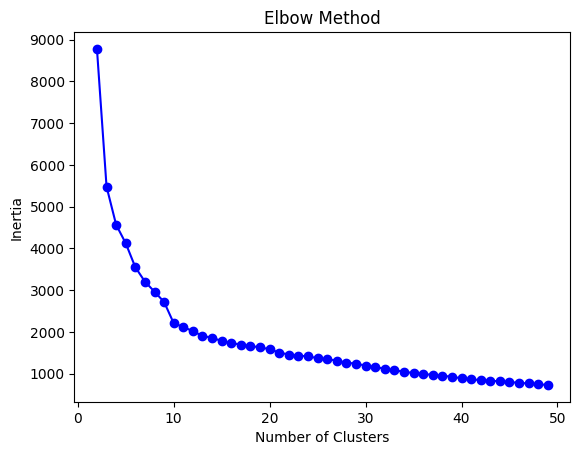

In [ ]:
# Define a range of cluster numbers to evaluate
k_values = range(2, 50)

# Perform K-means clustering for each number of clusters
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                max_iter=100, tol=0.0001, verbose=0,
                n_init = 'auto', algorithm = "lloyd", #{"lloyd", "elkan", "auto", "full"}, default="lloyd"
                random_state=42)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) against the number of clusters
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Define a range of cluster numbers to evaluate
k_values = range(2, 50)

# Calculate the silhouette score for each number of clusters
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                max_iter=100, tol=0.0001, verbose=0,
                n_init = 'auto', algorithm = "lloyd", #{"lloyd", "elkan", "auto", "full"}, default="lloyd"
                random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Print the silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f"Number of clusters: {k}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.4579924953200179
Number of clusters: 3, Silhouette Score: 0.2569856401366759
Number of clusters: 4, Silhouette Score: 0.22383289787039012
Number of clusters: 5, Silhouette Score: 0.20211121336026092
Number of clusters: 6, Silhouette Score: 0.1870552749628741
Number of clusters: 7, Silhouette Score: 0.18305632201167413
Number of clusters: 8, Silhouette Score: 0.15211118245658237
Number of clusters: 9, Silhouette Score: 0.1514772871068058
Number of clusters: 10, Silhouette Score: 0.15057328173992188
Number of clusters: 11, Silhouette Score: 0.13178748533898194
Number of clusters: 12, Silhouette Score: 0.14213769945188134
Number of clusters: 13, Silhouette Score: 0.12889499043754035
Number of clusters: 14, Silhouette Score: 0.12058664816007668
Number of clusters: 15, Silhouette Score: 0.1324049912715322
Number of clusters: 16, Silhouette Score: 0.13461759763677836
Number of clusters: 17, Silhouette Score: 0.12276924329781423
Number of clusters: 1

The silhouette score ranges from -1 to 1, where a higher score indicates better clustering results. Values close to 1 indicate well-separated clusters, values close to 0 indicate overlapping clusters, and negative values indicate that data points may have been assigned to the wrong clusters.

In [ ]:
df1['Kmean_Cluster'] = 0
# Perform clustering
k = 7  # Number of clusters
kmeans = KMeans(n_clusters=k,
                max_iter=300, tol=0.0001, verbose=0,
                n_init = 'auto', algorithm = "lloyd", #{"lloyd", "elkan", "auto", "full"}, default="lloyd"
                random_state=42
)
kmeans.fit(df1)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df1['Kmean_Cluster'] = cluster_labels

In [ ]:
cluster_labels = kmeans.labels_  # Assuming 'km' is the KMeans clustering model
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)


4    29
5    25
2    21
3    16
1    15
0    12
6     2
dtype: int64


In [ ]:
df1.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports,Kmean_Cluster
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3


In [ ]:
cluster_means = df1.groupby(cluster_labels).mean()
cluster_medians = df1.groupby(cluster_labels).median()

In [ ]:
cluster_means.iloc[:,4:9]

,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,0.583333,0.250000,0.750000,0.750000,0.250000
1,1.266667,0.533333,0.266667,0.066667,0.133333
2,0.904762,0.380952,0.857143,0.571429,0.952381
3,0.625000,0.125000,1.062500,0.500000,0.875000
4,1.068966,1.241379,1.172414,0.793103,0.655172
5,0.640000,0.320000,0.680000,0.400000,0.560000
6,1.500000,0.500000,0.500000,0.000000,0.500000


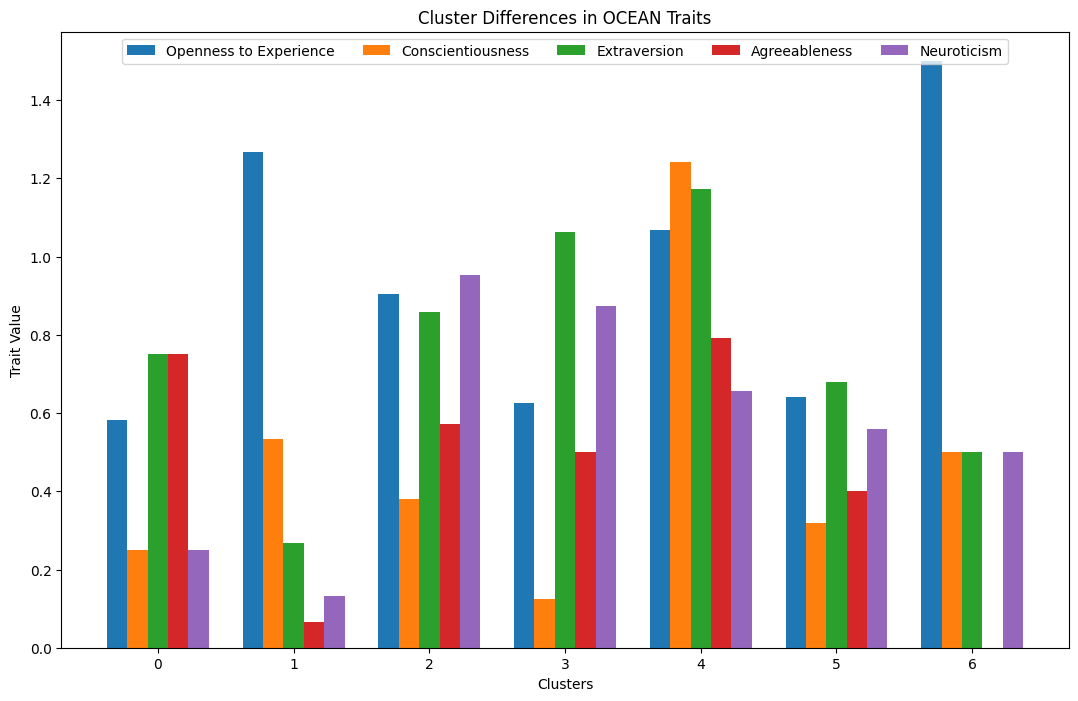

In [ ]:
ocean_df = cluster_means.iloc[:, 4:9]

# Set the cluster labels as the x-axis tick labels
x_labels = cluster_means.index

# Set the OCEAN traits as the column names
traits = ocean_df.columns

# Set the number of clusters and traits
num_clusters = ocean_df.shape[0]
num_traits = ocean_df.shape[1]

# Set the width of each bar
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = range(num_clusters)

# Plot the grouped bars for each trait
fig, ax = plt.subplots(figsize=(13, 8))
for i in range(num_traits):
    ax.bar([p + i * bar_width for p in positions], ocean_df.iloc[:, i], bar_width, label=traits[i])

# Set the x-axis labels and title
ax.set_xticks([p + (num_traits-1) * bar_width / 2 for p in positions])
ax.set_xticklabels(x_labels)
ax.set_xlabel('Clusters')
ax.set_ylabel('Trait Value')
ax.set_title('Cluster Differences in OCEAN Traits')

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)  

# Show the plot
plt.show()


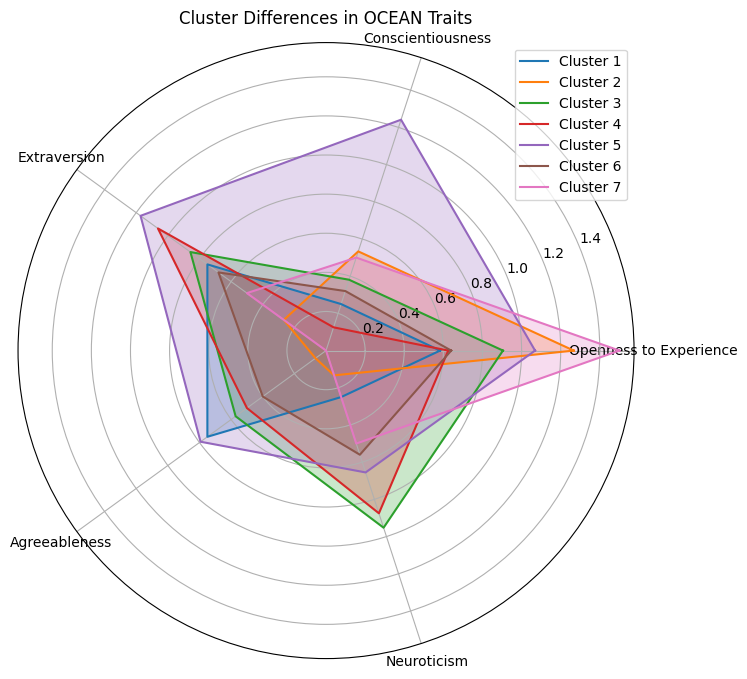

In [ ]:
ocean_df = cluster_means.iloc[:, 4:9]

# Set the cluster labels as the x-axis tick labels
x_labels = cluster_means.index

# Set the OCEAN traits as the column names
traits = ocean_df.columns

# Set the number of clusters and traits
num_clusters = ocean_df.shape[0]
num_traits = ocean_df.shape[1]

# Set the angles for the radar chart axes
angles = np.linspace(0, 2 * np.pi, num_traits, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the chart

# Plot the radar charts
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
for i in range(num_clusters):
    values = ocean_df.iloc[i, :].values.tolist()
    values += values[:1]  # Repeat the first value to close the chart
    ax.plot(angles, values, label=f'Cluster {i + 1}')
    ax.fill(angles, values, alpha=0.25)

# Set the radar chart labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(traits)
ax.set_title('Cluster Differences in OCEAN Traits')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
df1.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports,Kmean_Cluster
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3


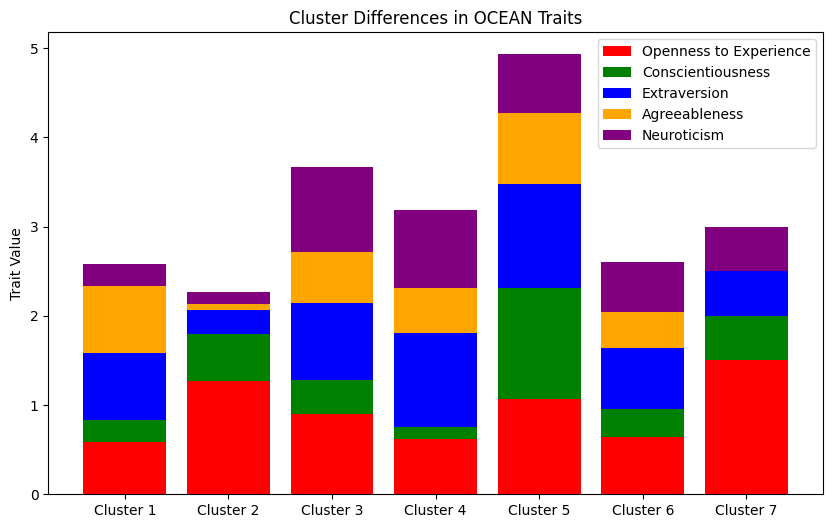

In [ ]:
import matplotlib.pyplot as plt

ocean_df = cluster_means.iloc[:, 4:9]

# Set the number of clusters and traits
num_clusters = ocean_df.shape[0]
num_traits = ocean_df.shape[1]

# Set the x-axis values (cluster labels)
x = range(num_clusters)

# Set the colors for each trait
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Plot the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None
for i, trait in enumerate(ocean_df.columns):
    trait_values = ocean_df[trait].values.tolist()
    ax.bar(x, trait_values, bottom=bottom, label=trait, color=colors[i])
    if bottom is None:
        bottom = trait_values
    else:
        bottom = [b + v for b, v in zip(bottom, trait_values)]

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels([f'Cluster {i+1}' for i in x])

# Set the y-axis label
ax.set_ylabel('Trait Value')

# Set the plot title and legend
ax.set_title('Cluster Differences in OCEAN Traits')
ax.legend()

# Show the plot
plt.show()


<Axes: >

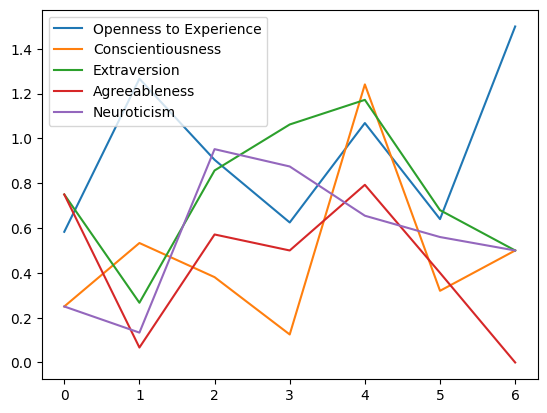

In [ ]:
ocean_df.plot()

In [ ]:
# Count the number of records that belong to the same "Cluster" and "Gender"
record_counts = df1.groupby(['Kmean_Cluster', 'Gender']).size()
print(record_counts)

Kmean_Cluster  Gender
0              0          2
               1         10
1              0          5
               1         10
2              0          9
               1         12
3              0          5
               1         11
4              0         12
               1         17
5              0         10
               1         15
6              1          2
dtype: int64


## Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

df1['Aglo_Cluster'] = 0
# Perform clustering

# k = 9  # Number of clusters
Aglo = AgglomerativeClustering(n_clusters=k)
Aglo.fit(df1)

# Get the cluster labels
cluster_labels = Aglo.labels_

# Add the cluster labels to the original dataframe
df1['Aglo_Cluster'] = Aglo.labels_


In [ ]:
df1.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports,Kmean_Cluster,Aglo_Cluster
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,6
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,4
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,2


In [ ]:
cluster_labels = Aglo.labels_ 
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

2    38
4    30
6    20
1    12
0    11
5     7
3     2
dtype: int64


In [ ]:
click_df = df[label_columns]
click_df['Kmean_Cluster'] = df1['Kmean_Cluster']
click_df['Aglo_Cluster'] = df1['Aglo_Cluster']

<ipython-input-40-e59c182c5986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_df['Kmean_Cluster'] = df1['Kmean_Cluster']
<ipython-input-40-e59c182c5986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_df['Aglo_Cluster'] = df1['Aglo_Cluster']


In [ ]:
click_df.head()

,clicks Automotive,clicks Baby Products,clicks Health & Beauty,clicks Media,clicks Consumer Electronics,clicks Console & Video Games,clicks Tools,clicks Living,clicks Grocery,clicks Home,clicks Betting,clicks Jewellery & Watches,clicks Musical Instruments,clicks Office,clicks Pet Supplies,clicks Computer Software,clicks Sports,clicks Toys & Games,clicks Dating,clicks Clothing & Shoes,Kmean_Cluster,Aglo_Cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,2,6
2,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1
4,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,3,2


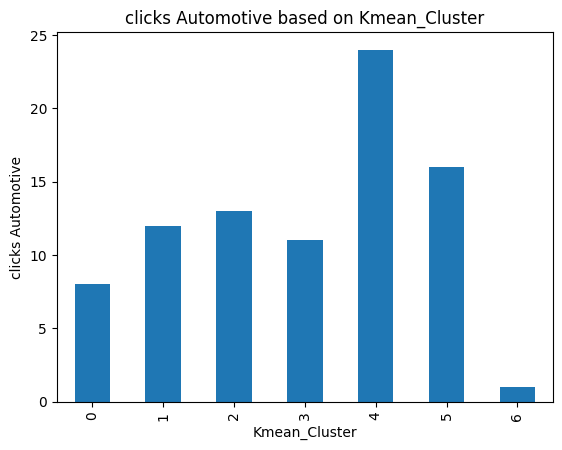

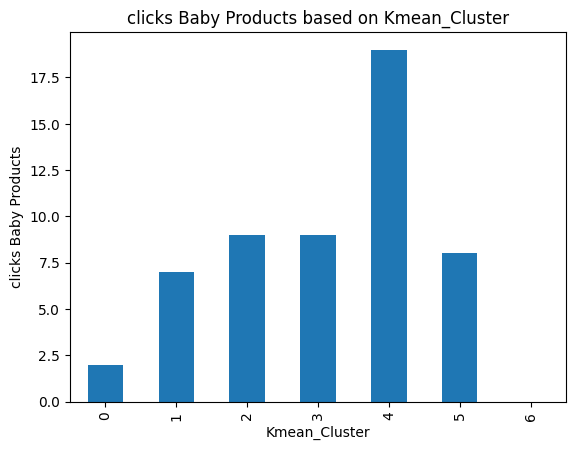

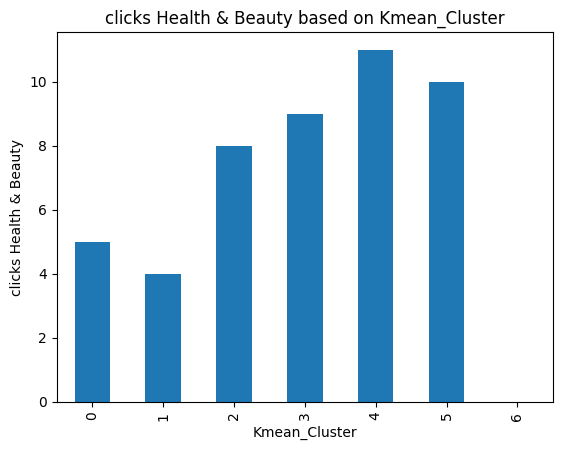

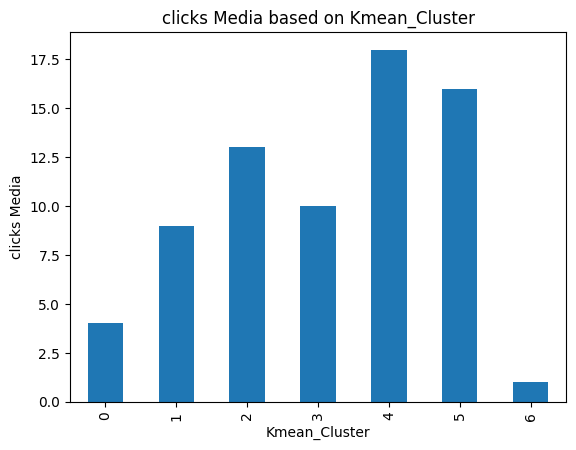

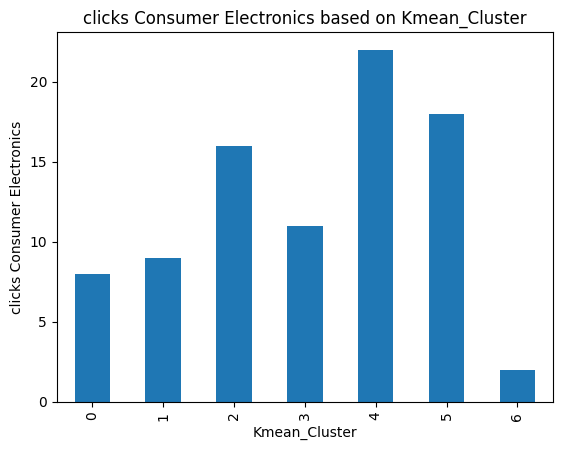

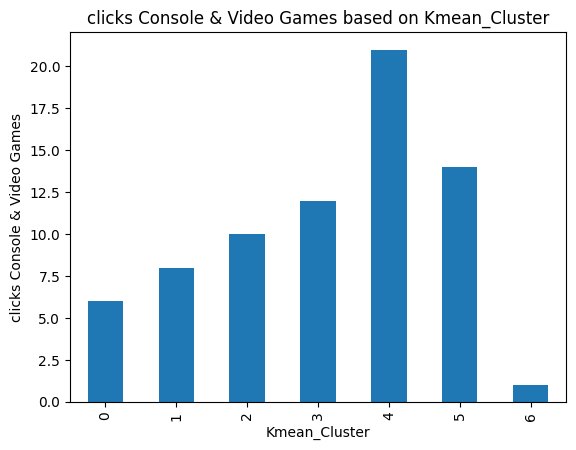

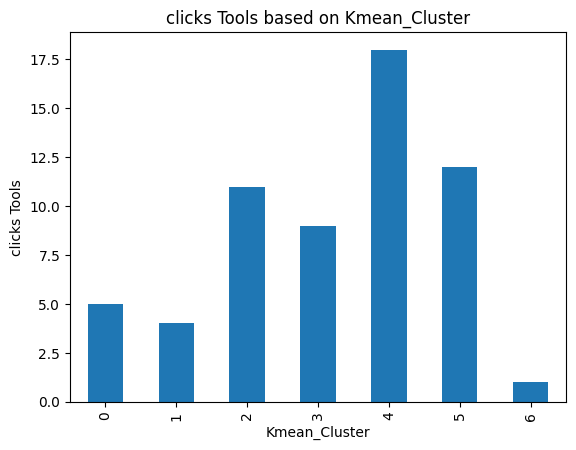

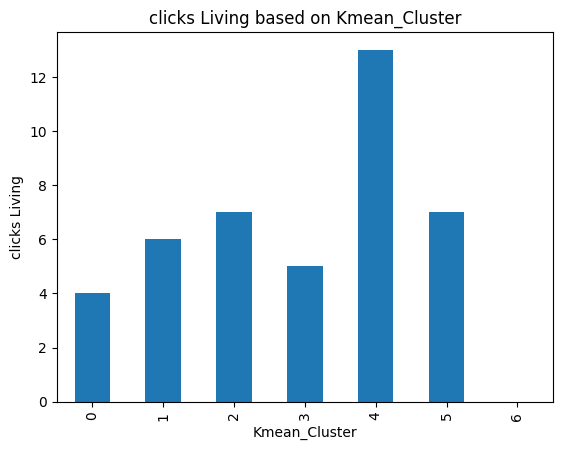

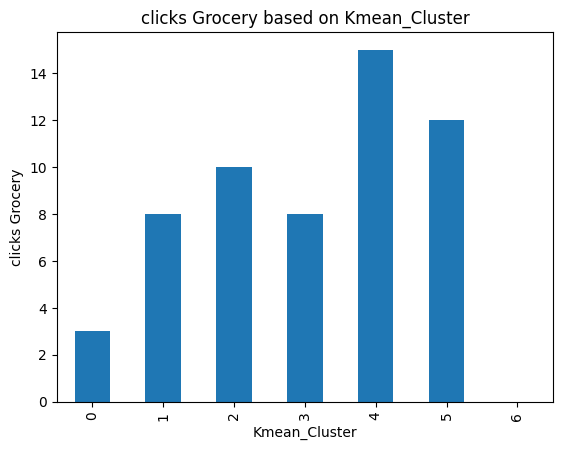

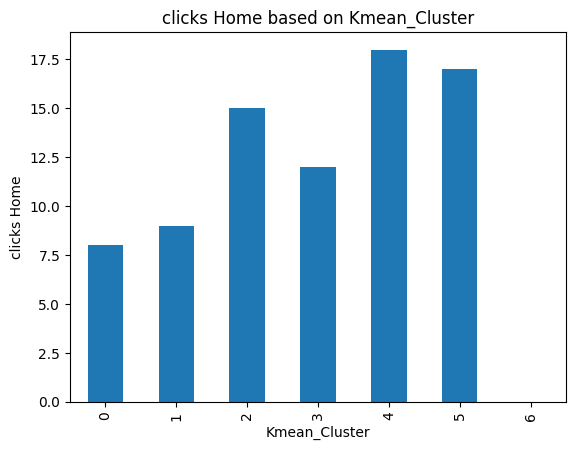

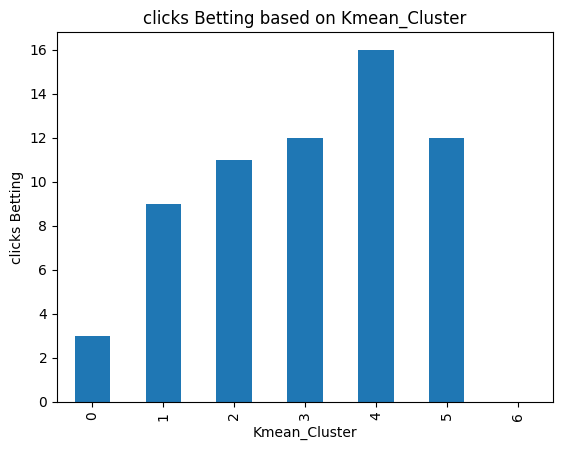

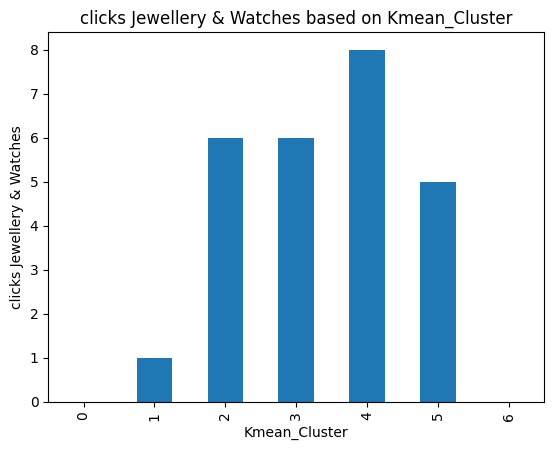

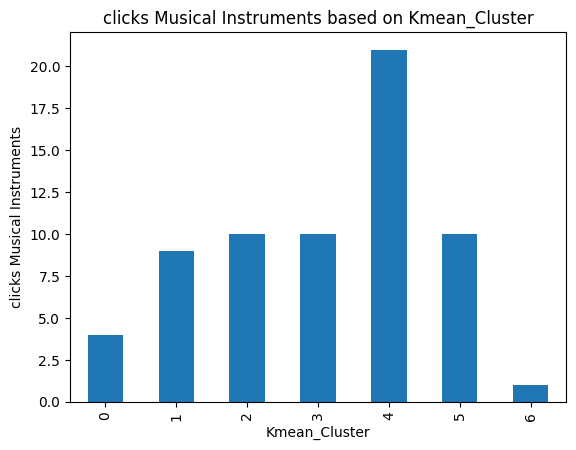

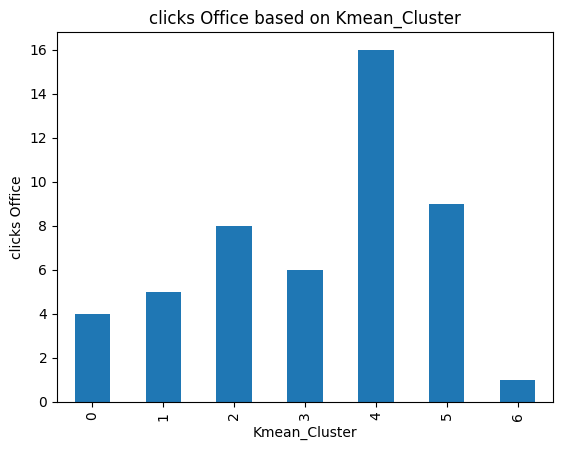

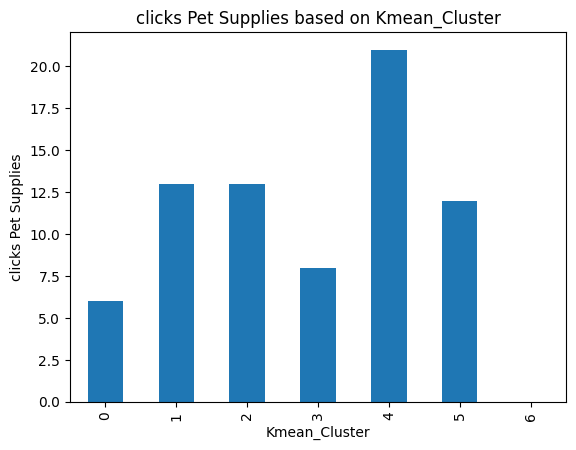

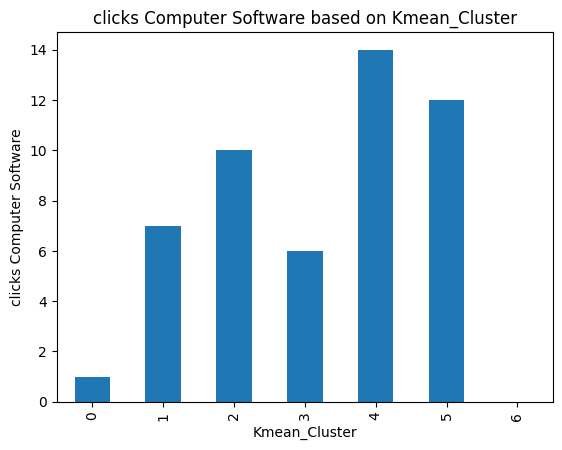

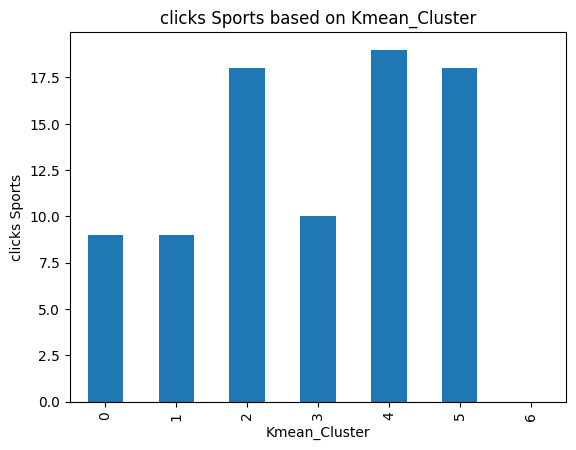

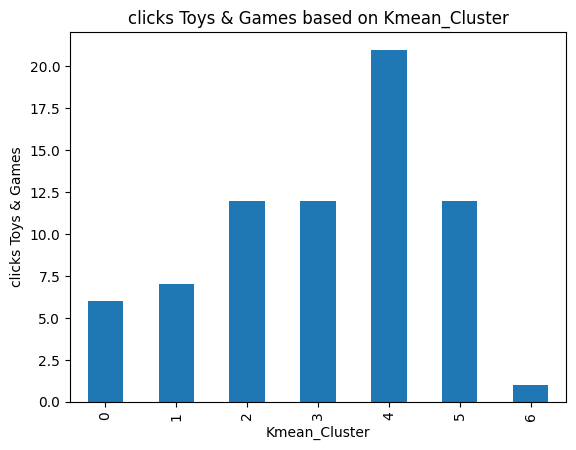

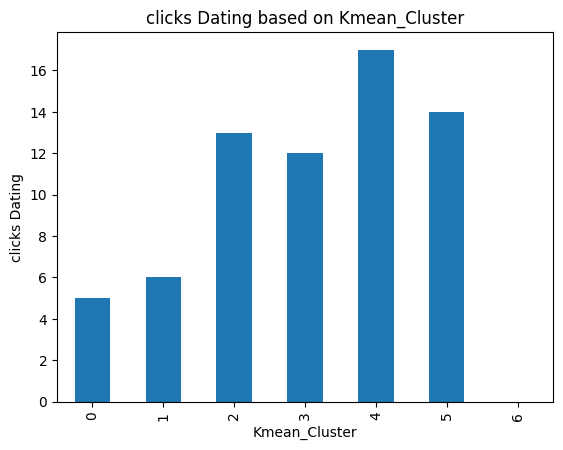

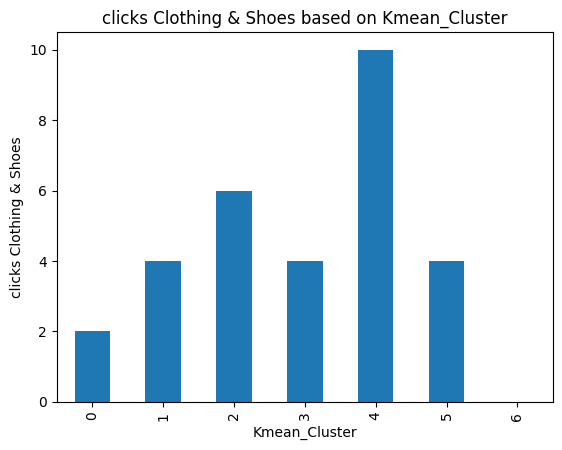

In [ ]:
# Selecting the click columns for plotting
click_columns = click_df.columns[:-2]  # Exclude the first column ('clicks Automotive') and last two columns

# Plotting the 'Kmean_Cluster' based on the click columns
for column in click_columns:
    plt.figure()
    click_df.groupby('Kmean_Cluster')[column].sum().plot(kind='bar')
    plt.xlabel('Kmean_Cluster')
    plt.ylabel(column)
    plt.title(f'{column} based on Kmean_Cluster')
    plt.show()


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/Kmeans_Cluster.csv'

# Export the DataFrame to CSV
click_df['Kmean_Cluster'].to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
